In [1]:
import numpy as np
import pandas as pd


In [2]:
walmart=pd.read_csv(r"E:\excel files\Walmart.csv")

In [3]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [5]:
walmart.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [5]:
import duckdb as du

In [6]:
se=du.query('''
           SELECT category,sum(invoice_id) as total_unitprice
           FROM walmart
           group by category
''').to_df()

In [7]:
se

,category,total_unitprice
0,Food and beverages,88196.0
1,Fashion accessories,24353849.0
2,Electronic accessories,1585715.0
3,Home and lifestyle,24331363.0
4,Health and beauty,75321.0
5,Sports and travel,79281.0


In [8]:
walmart.tail(10)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10041,9991,WALM074,Weslaco,Home and lifestyle,$35,3.0,09/07/20,6:38:00,Cash,5.0,0.33
10042,9992,WALM087,Waxahachie,Fashion accessories,$48,3.0,09/09/23,10:54:00,Cash,6.0,0.33
10043,9993,WALM073,Seguin,Home and lifestyle,$31,2.0,01/11/23,15:21:00,Cash,5.0,0.33
10044,9994,WALM055,Waxahachie,Fashion accessories,$34,1.0,29/04/23,14:34:00,Cash,6.0,0.33
10045,9995,WALM030,Richardson,Home and lifestyle,$62,1.0,15/02/21,9:04:00,Cash,3.0,0.48
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
10050,10000,WALM069,Rockwall,Fashion accessories,$62,3.0,26/09/20,9:48:00,Cash,3.0,0.33


In [9]:
walmart.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [10]:
walmart.shape

(10051, 11)

In [11]:
walmart.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [13]:
walmart.duplicated().sum()

np.int64(51)

In [15]:
walmart.drop_duplicates(inplace=True)
walmart.duplicated().sum()

np.int64(0)

In [17]:
walmart.shape

(10000, 11)

In [18]:
walmart.dropna(inplace=True)

In [19]:
walmart.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [20]:
walmart.shape

(9969, 11)

In [24]:
walmart['unit_price'] = walmart['unit_price'].str.replace('$','').astype(float)

In [25]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48


In [27]:
walmart['total_price']=walmart['unit_price']*walmart['quantity']

In [28]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.00
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.00
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.00
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.00


In [36]:
pe = du.query("""
    SELECT 
        category,
        SUM(total_price) AS total_price
    FROM walmart
    GROUP BY category
    ORDER BY total_price DESC
    LIMIT 5
""").to_df()


In [37]:
pe

,category,total_price
0,Fashion accessories,489480.90
1,Home and lifestyle,489250.06
2,Electronic accessories,78175.03
3,Food and beverages,53471.28
4,Sports and travel,52497.93


In [38]:
import matplotlib.pyplot as plt

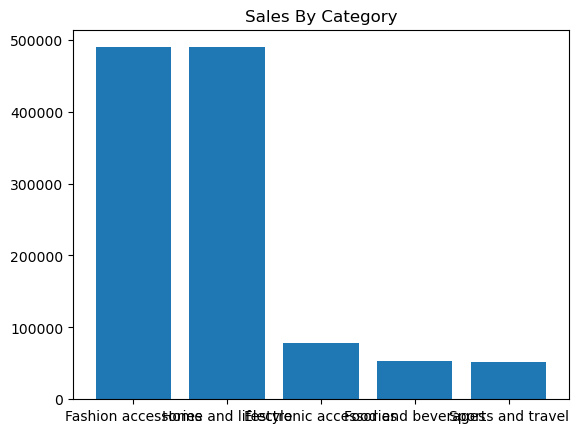

In [40]:
plt.bar(data=pe,
        x=pe['category'],
        height=pe['total_price'])
plt.title("Sales By Category")
plt.show()

In [42]:
walmart.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'total_price'],
      dtype='object')

In [44]:
walmart.date

0       05/01/19
1       08/03/19
2       03/03/19
3       27/01/19
4       08/02/19
          ...   
9995    03/08/23
9996    22/02/21
9997    15/06/23
9998    25/02/21
9999    26/09/20
Name: date, Length: 9969, dtype: object

In [49]:
walmart['date'] = pd.to_datetime(
    walmart['date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)


In [50]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-08-03,10:10:00,Cash,3.0,0.33,111.00
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00


In [54]:
walmart['date_month']=pd.to_datetime(walmart['date'],format="%m")

In [55]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,date_month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,2019-01-05
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,2019-03-08
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,2019-03-03
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,2019-01-27
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,2019-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-08-03,10:10:00,Cash,3.0,0.33,111.00,2023-08-03
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00,2021-02-22
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00,2023-06-15
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00,2021-02-25


In [60]:
walmart = walmart.drop(columns=['date_month'])

In [61]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-08-03,10:10:00,Cash,3.0,0.33,111.00
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00


In [62]:
walmart['month']=walmart['date'].dt.month

In [63]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,1
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,3
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,3
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,1
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-08-03,10:10:00,Cash,3.0,0.33,111.00,8
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00,2
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00,6
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00,2


In [64]:
walmart['Year']=walmart['date'].dt.year

In [65]:
walmart

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,month,Year
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,1,2019
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,3,2019
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,3,2019
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,1,2019
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,2023-08-03,10:10:00,Cash,3.0,0.33,111.00,8,2023
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,2021-02-22,14:20:00,Cash,7.0,0.48,116.00,2,2021
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,2023-06-15,16:00:00,Credit card,4.0,0.48,156.00,6,2023
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,2021-02-25,12:25:00,Cash,7.0,0.48,158.00,2,2021


In [69]:
gr=walmart.groupby(by=['Year']).agg(Revenue=("total_price","sum"))

In [70]:
gr

,Revenue
Year,
2019,307587.38
2020,219423.00
2021,233051.00
2022,217405.00
2023,232260.00


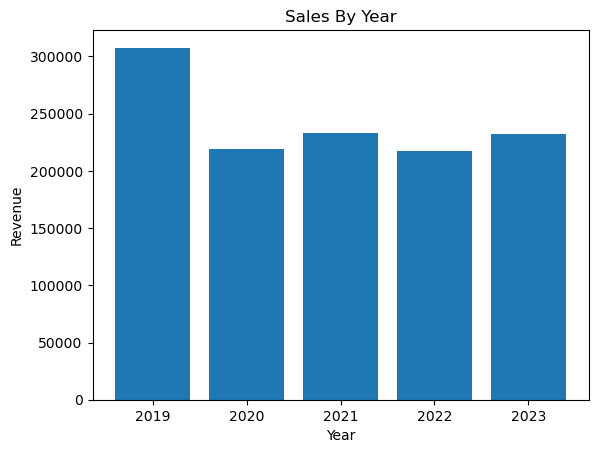

In [72]:
gr = (
    walmart.groupby('Year')
    .agg(Revenue=('total_price', 'sum'))
    .reset_index()
)

plt.bar(
    x=gr['Year'],
    height=gr['Revenue']
)
plt.title("Sales By Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()


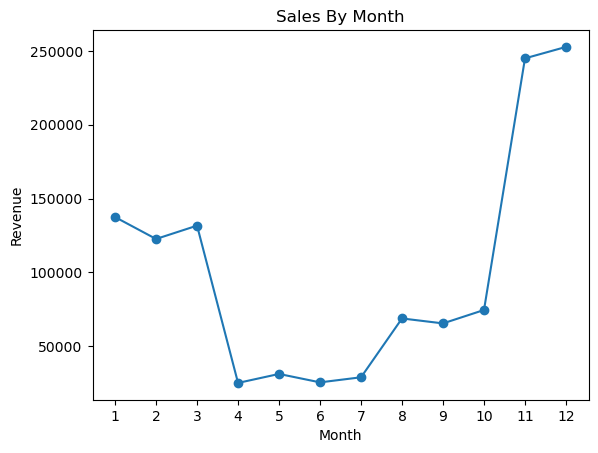

In [79]:
ui = (
    walmart.groupby('month')
    .agg(Revenue=('total_price', 'sum'))
    .reset_index()
)

plt.plot(
    ui['month'],
    ui['Revenue'],
    marker='o'
)
plt.title("Sales By Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(ui['month'])
plt.show()
